# Basic Example

## Importing packages

In [1]:
import af2_analysis
from af2_analysis import clustering
from af2_analysis import peptide
import nglview
%matplotlib inline

/home/murail/miniforge3/envs/docking/lib/python3.10/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


## Importing Alpahfold Data 

In [12]:
DATA_PATH = '../../../src/af2_analysis/test/inputs/beta_amyloid_dimer_cf_1.5.5/'
my_data = af2_analysis.Data(DATA_PATH)
my_data.df.head()

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

,query,seed,model,weight,recycle,pLDDT,pTM,ipTM,ranking_confidence,pdb,json
0,beta_amyloid_dimer_d2fa3_0,0,1,alphafold2_multimer_v3,9,38.8,0.159,0.0812,0.09676,../../../src/af2_analysis/test/inputs/beta_amy...,../../../src/af2_analysis/test/inputs/beta_amy...
1,beta_amyloid_dimer_d2fa3_0,0,2,alphafold2_multimer_v3,16,35.2,0.130,0.0685,0.08080,../../../src/af2_analysis/test/inputs/beta_amy...,../../../src/af2_analysis/test/inputs/beta_amy...
2,beta_amyloid_dimer_d2fa3_0,0,3,alphafold2_multimer_v3,3,44.5,0.250,0.1610,0.17880,../../../src/af2_analysis/test/inputs/beta_amy...,../../../src/af2_analysis/test/inputs/beta_amy...
3,beta_amyloid_dimer_d2fa3_0,0,4,alphafold2_multimer_v3,5,44.2,0.234,0.1580,0.17320,../../../src/af2_analysis/test/inputs/beta_amy...,../../../src/af2_analysis/test/inputs/beta_amy...
4,beta_amyloid_dimer_d2fa3_0,0,5,alphafold2_multimer_v3,5,64.2,0.568,0.5410,0.54640,../../../src/af2_analysis/test/inputs/beta_amy...,../../../src/af2_analysis/test/inputs/beta_amy...


## show 3D structure

In [13]:
view = my_data.show_3d(0)
view

NGLWidget()

## Computing scores


In [14]:
#compute_pdockq
my_data.compute_pdockq()
#compute_pdockq2
my_data.compute_pdockq2()

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [15]:
#extract_pae_pep
peptide.extract_pae_pep(my_data)
#compute_pdockq2_lig
peptide.compute_pdockq2_lig(my_data)
#compute_LIS_pep
peptide.compute_LIS_pep(my_data)
#extract_plddt_pep
peptide.extract_plddt_pep(my_data)


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [16]:
my_data.df.head()

,query,seed,model,weight,recycle,pLDDT,pTM,ipTM,ranking_confidence,pdb,...,PAE_A_B,PAE_B_A,PAE_B_B,PAE_pep_rec,PAE_rec_pep,pdockq2_lig,LIS,LIS_rec_pep,LIS_pep_rec,plddt_pep
0,beta_amyloid_dimer_d2fa3_0,0,1,alphafold2_multimer_v3,9,38.8,0.159,0.0812,0.09676,../../../src/af2_analysis/test/inputs/beta_amy...,...,20.984252,21.026196,16.054161,21.026196,20.984252,0.011992,"[[0.44785182119205297, 0.11038825757575756], [...",0.107481,0.110388,38.685476
1,beta_amyloid_dimer_d2fa3_0,0,2,alphafold2_multimer_v3,16,35.2,0.130,0.0685,0.08080,../../../src/af2_analysis/test/inputs/beta_amy...,...,22.746667,22.760130,17.193441,22.760130,22.746667,0.010624,"[[0.4598769470404984, 0.10359090909090911], [0...",0.103333,0.103591,34.902857
2,beta_amyloid_dimer_d2fa3_0,0,3,alphafold2_multimer_v3,3,44.5,0.250,0.1610,0.17880,../../../src/af2_analysis/test/inputs/beta_amy...,...,19.257993,19.228260,13.493810,19.228260,19.257993,0.014287,"[[0.48629706152433433, 0.08237745098039216], [...",0.084944,0.082377,44.560238
3,beta_amyloid_dimer_d2fa3_0,0,4,alphafold2_multimer_v3,5,44.2,0.234,0.1580,0.17320,../../../src/af2_analysis/test/inputs/beta_amy...,...,19.288968,19.363730,14.125618,19.363730,19.288968,0.016360,"[[0.4926578192252511, 0.10013468013468015], [0...",0.099600,0.100135,44.120952
4,beta_amyloid_dimer_d2fa3_0,0,5,alphafold2_multimer_v3,5,64.2,0.568,0.5410,0.54640,../../../src/af2_analysis/test/inputs/beta_amy...,...,11.075300,11.190368,8.268022,11.190368,11.075300,0.168438,"[[0.5450712678169541, 0.41792701625268325], [0...",0.417809,0.417927,64.091667


## Plots

### Plddt plot

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

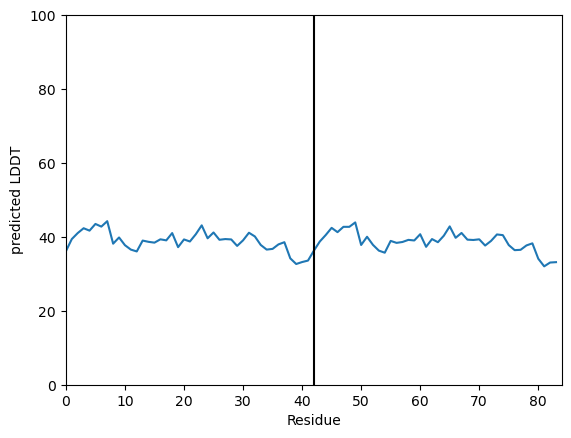

In [17]:
# Model 1
my_data.plot_plddt([0])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

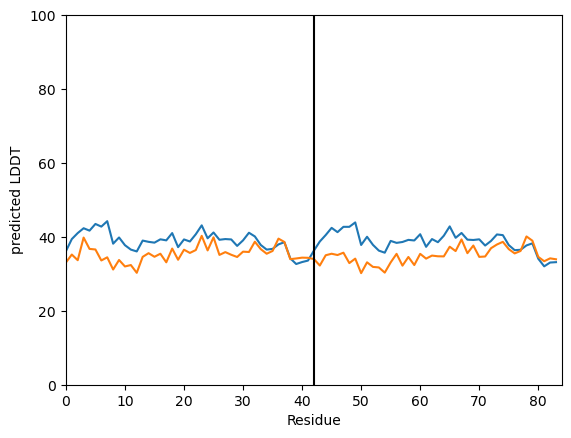

In [18]:
# Model 1 and 2  
my_data.plot_plddt([0,1])

### Plddt pae

(<Figure size 640x480 with 2 Axes>, <Axes: >)

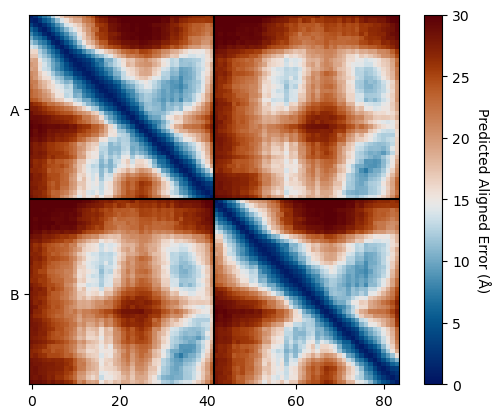

In [19]:
# Model 1
my_data.plot_pae(0)

## Clustering

In [23]:
clustering.hierarchical(my_data.df)

Read all structures


IndexError: index 636 is out of bounds for axis 0 with size 636

In [84]:
# Updated Dataframe
sub_df.head()

,query,seed,model,weight,recycle,pLDDT,pTM,ipTM,ranking_confidence,pdb,...,PAE_C_B,PAE_C_C,PAE_pep_rec,PAE_rec_pep,pdockq2_lig,LIS,LIS_rec_pep,LIS_pep_rec,plddt_pep,cluster
175,7O6N,0,1,alphafold2_multimer_v3,3,67.9,0.669,0.217,0.3074,/home/sdv/m1isdd/areguei/Bureau/reguei/42_bret...,...,NaN,NaN,21.777284,16.385176,0.011479,"[[0.7399053336204731, 0.19127909767218623], [0...",0.085700,0.191279,33.109744,12
176,7O6N,0,2,alphafold2_multimer_v3,3,68.2,0.654,0.191,0.2836,/home/sdv/m1isdd/areguei/Bureau/reguei/42_bret...,...,NaN,NaN,22.308165,17.608967,0.010211,"[[0.7355853433289874, 0.23133113069016153], [0...",0.100023,0.231331,35.276667,7
177,7O6N,0,3,alphafold2_multimer_v3,3,67.8,0.657,0.182,0.2770,/home/sdv/m1isdd/areguei/Bureau/reguei/42_bret...,...,NaN,NaN,23.072987,17.965342,0.012288,"[[0.7442368098380756, 0.22738251879699248], [0...",0.098805,0.227383,33.292821,3
178,7O6N,0,4,alphafold2_multimer_v3,3,68.3,0.652,0.176,0.2712,/home/sdv/m1isdd/areguei/Bureau/reguei/42_bret...,...,NaN,NaN,22.946657,18.130899,0.009420,"[[0.7429343412757774, 0.16144277108433736], [0...",0.071179,0.161443,34.835128,7
179,7O6N,0,5,alphafold2_multimer_v3,3,65.9,0.647,0.161,0.2582,/home/sdv/m1isdd/areguei/Bureau/reguei/42_bret...,...,NaN,NaN,23.890301,18.327476,0.008786,"[[0.737623125564589, 0.17724919093851133], [0....",0.071105,0.177249,30.011538,4


## Principal component analysis

In [24]:
# # Example : 7O6N strucutres
clustering.compute_pc(sub_df)
clustering.plot_pc(sub_df)

UnboundLocalError: local variable 'null_number' referenced before assignment